In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

30


(array([4., 2., 0., 6., 5., 0., 6., 3., 1., 2., 0., 0., 0., 1.]),
 array([ 85.        ,  87.64285714,  90.28571429,  92.92857143,
         95.57142857,  98.21428571, 100.85714286, 103.5       ,
        106.14285714, 108.78571429, 111.42857143, 114.07142857,
        116.71428571, 119.35714286, 122.        ]),
 <a list of 14 Patch objects>)

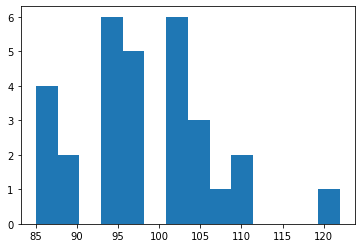

In [2]:
# １時間あたり平均lamda回クリックされるウェブ広告のポアソン分布に従う試行データをtrial時間取得する
# 母分散はλであることは既知とする。
lamda=100
trial=30
x = np.random.poisson(lamda,trial)
print(x.size)
plt.hist(x, 14)

In [3]:
print(np.mean(x))

98.03333333333333


In [4]:
# 事前の無情報のガンマ分布を更新
### パラメータを与えた時のガンマ分布を描画する
alpha = 0.5 # ガンマ分布のパラメータα shapeパラメータkでもある
beta = 0 # ガンマ分布のパラメータβ Scaleパラメータθ=1/β

# 事後分布a b
alpha_post=np.mean(x)*trial+alpha
beta_post=trial+beta

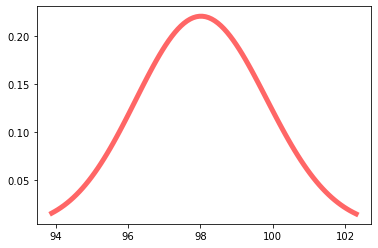

In [5]:
# 確率密度関数 ベイズ更新後の
from scipy.stats import gamma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
a = alpha_post
x_bayes = np.linspace(gamma.ppf(0.01, a ,loc=0, scale=1/beta_post),
                gamma.ppf(0.99, a ,loc=0, scale=1/beta_post), 100)
ax.plot(x_bayes, gamma.pdf(x_bayes, a,loc=0,scale=1/beta_post),
       'r-', lw=5, alpha=0.6, label='gamma pdf')

plt.show()

In [6]:
# ポアソン分布の母数の標準正規化での、非ベイズ検定
z=(np.mean(x)-lamda)/math.sqrt(lamda/trial)
print(z)

-1.0771876964268277


In [7]:
import pymc3
pymc3.stats.hpd(x_bayes)

array([ 94.14827385, 102.13472745])

In [8]:
# ベイズではない信頼区間
left = (np.mean(x))-1.96*math.sqrt(lamda/trial)
right=(np.mean(x))+1.96*math.sqrt(lamda/trial)
print(left)
print(right)

94.45487929096625
101.61178737570042


In [9]:
print(x)

[ 96  96 108  97  94  86 102  95  94 106 104 105  85  94 110 122  90 103
 102 110  96  93 102  97  89  85  85 101 101  93]
